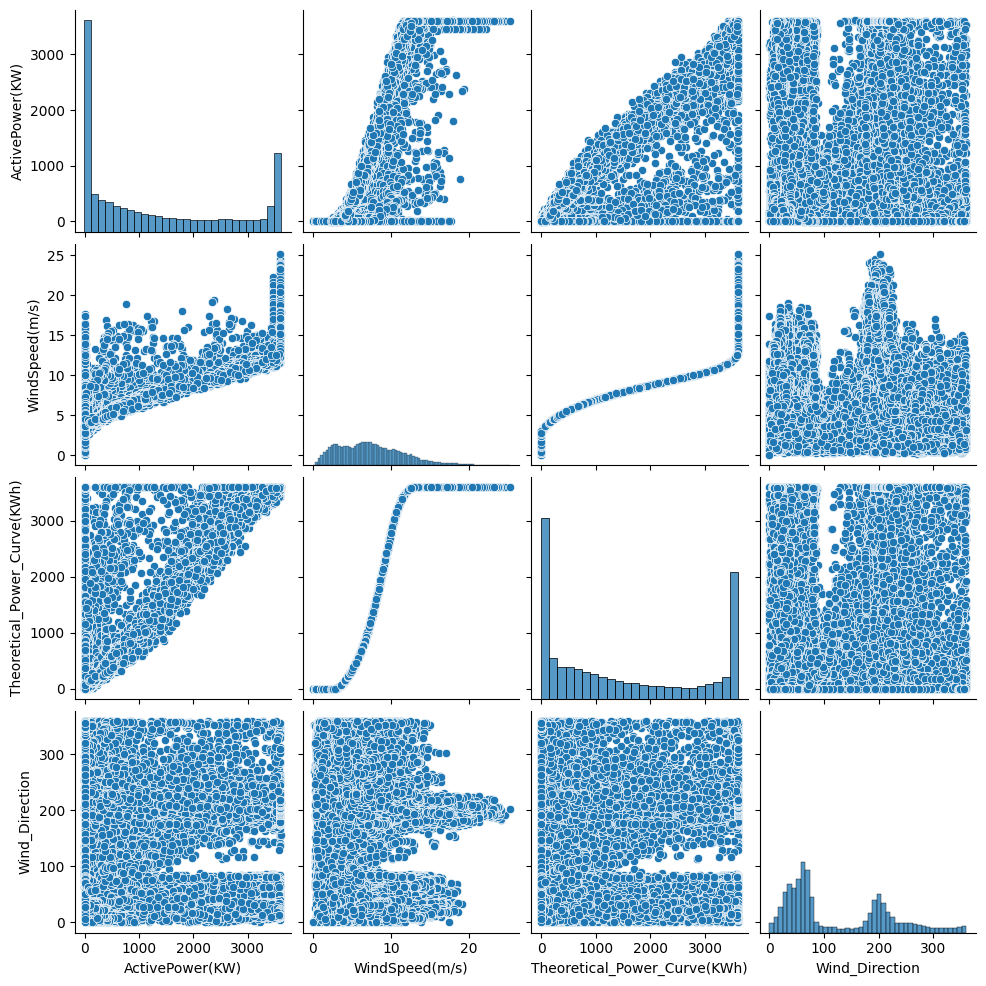

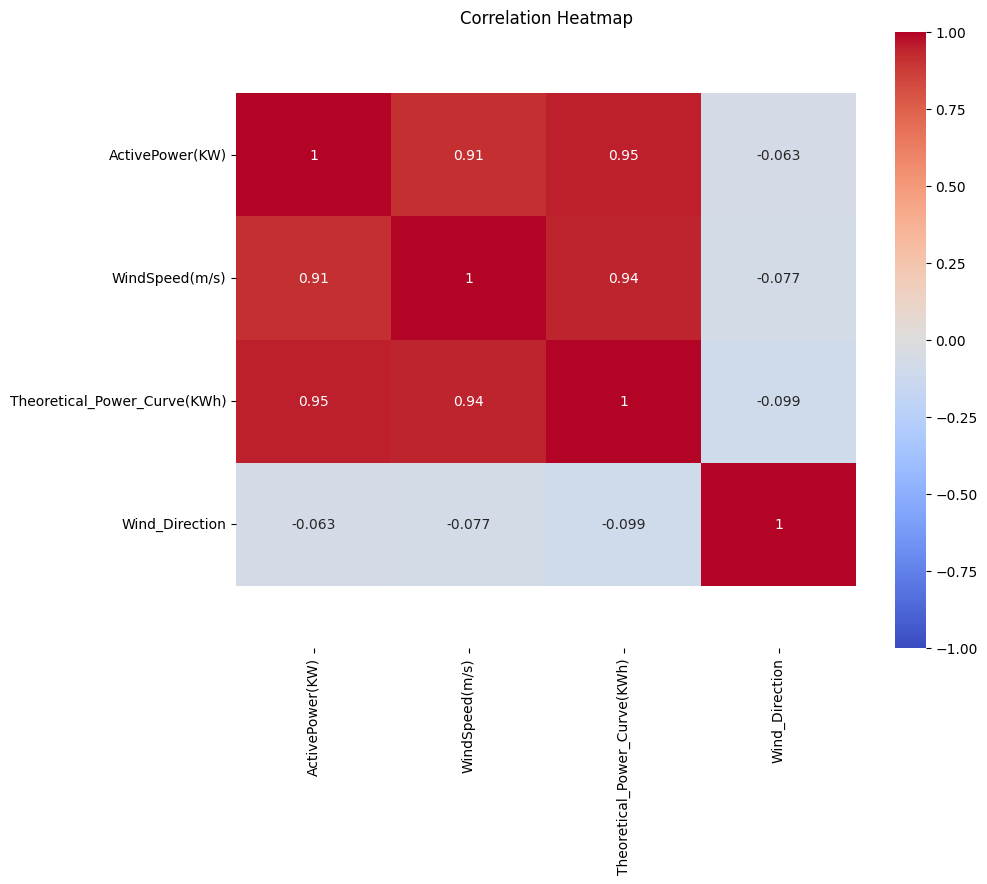

Correlation Matrix:
                              ActivePower(KW)  WindSpeed(m/s)  \
ActivePower(KW)                      1.000000        0.912774   
WindSpeed(m/s)                       0.912774        1.000000   
Theoretical_Power_Curve(KWh)         0.949918        0.944209   
Wind_Direction                      -0.062702       -0.077188   

                              Theoretical_Power_Curve(KWh)  Wind_Direction  
ActivePower(KW)                                   0.949918       -0.062702  
WindSpeed(m/s)                                    0.944209       -0.077188  
Theoretical_Power_Curve(KWh)                      1.000000       -0.099076  
Wind_Direction                                   -0.099076        1.000000  
Training Data Shapes:
Features (train_X): (37897, 3)
Target (train_y): (37897,)

Validation Data Shapes:
Features (val_X): (12633, 3)
Target (val_y): (12633,)
Mean Absolute Error: 164.53113560922998
R^2 Score: 0.9131254350454864


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Function to load and preprocess the data
def load_and_preprocess_data(path):
    df = pd.read_csv(path)
    df.rename(columns={
        'Date/Time': 'Time',
        'LV ActivePower (kW)': 'ActivePower(KW)',
        'Theoretical_Power_Curve (KWh)': 'Theoretical_Power_Curve(KWh)',
        'Wind Speed (m/s)': 'WindSpeed(m/s)',
        'Wind Direction (°)': 'Wind_Direction'
    }, inplace=True)
    df.columns = df.columns.str.strip()
    return df

# Function to perform exploratory data analysis (EDA)
def perform_eda(df):
    sns.pairplot(df)
    plt.show()

    plt.figure(figsize=(10, 8))
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    corr = df[numeric_cols].corr()

    ax = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title('Correlation Heatmap')
    plt.show()

    print("Correlation Matrix:")
    print(corr)

# Function to split the data into training and validation sets
def split_data(df):
    y = df['ActivePower(KW)']
    X = df[['Theoretical_Power_Curve(KWh)', 'WindSpeed(m/s)', 'Wind_Direction']]

    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

    print("Training Data Shapes:")
    print("Features (train_X):", train_X.shape)
    print("Target (train_y):", train_y.shape)
    print("\nValidation Data Shapes:")
    print("Features (val_X):", val_X.shape)
    print("Target (val_y):", val_y.shape)

    return train_X, val_X, train_y, val_y

# Function to train the model
def train_model(train_X, train_y):
    forest_model = RandomForestRegressor(n_estimators=750, max_depth=4, max_leaf_nodes=500, random_state=1)
    forest_model.fit(train_X, train_y)
    return forest_model

# Function to evaluate the model
def evaluate_model(model, val_X, val_y):
    power_preds = model.predict(val_X)
    print("Mean Absolute Error:", mean_absolute_error(val_y, power_preds))
    print("R^2 Score:", r2_score(val_y, power_preds))

# Main script
if __name__ == "__main__":
    path = r"data/T1.csv"
    df = load_and_preprocess_data(path)
    perform_eda(df)
    train_X, val_X, train_y, val_y = split_data(df)
    model = train_model(train_X, train_y)
    evaluate_model(model, val_X, val_y)
    joblib.dump(model, "power_prediction.sav")